<a href="https://colab.research.google.com/github/Kuo2022/20220702-python/blob/main/20220730.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##使用 Teachable Machine 幫我們訓練好的模型

In [1]:
!unzip model.zip

Archive:  model.zip
 extracting: keras_model.h5          
 extracting: labels.txt              


In [3]:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np

# Load the model
model = load_model('keras_model.h5')

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
# Replace this with the path to your image
image = Image.open('kuo.jpg')
#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)
# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
print(prediction)

[[9.999726e-01 2.742523e-05]]


##使用Gradio打包上面模型來做

In [ ]:
!pip install gradio

In [6]:
def classify(image):
  # Load the model
  model = load_model('keras_model.h5')

  # Create the array of the right shape to feed into the keras model
  # The 'length' or number of images you can put into the array is
  # determined by the first position in the shape tuple, in this case 1.
  data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
  #resize the image to a 224x224 with the same strategy as in TM2:
  #resizing the image to be at least 224x224 and then cropping from the center
  size = (224, 224)
  image = ImageOps.fit(image, size, Image.ANTIALIAS)

  #turn the image into a numpy array
  image_array = np.asarray(image)
  # Normalize the image
  normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
  # Load the image into the array
  data[0] = normalized_image_array

  # run the inference
  prediction = model.predict(data)
  labels = ["戴著口罩的Kuo", "沒有戴口罩的Kuo"]
  return labels[np.argmax(prediction)]

In [7]:
import gradio as gr

In [ ]:
gr.Interface(classify, inputs=gr.Image(type="pil"), outputs="text").launch(share=True)

In [9]:
x = [1, 2, 3]

In [10]:
np.argmax(x)

2

##練習
請輸出0-15的二進位及十六進位數值

In [12]:
for i in range(16):
  print(f"{i:2} 的二進位是：{i}")

 0 的二進位是：0
 1 的二進位是：1
 2 的二進位是：2
 3 的二進位是：3
 4 的二進位是：4
 5 的二進位是：5
 6 的二進位是：6
 7 的二進位是：7
 8 的二進位是：8
 9 的二進位是：9
10 的二進位是：10
11 的二進位是：11
12 的二進位是：12
13 的二進位是：13
14 的二進位是：14
15 的二進位是：15


In [13]:
for i in range(16):
  print(f"{i:02} 的二進位是：{i}")

00 的二進位是：0
01 的二進位是：1
02 的二進位是：2
03 的二進位是：3
04 的二進位是：4
05 的二進位是：5
06 的二進位是：6
07 的二進位是：7
08 的二進位是：8
09 的二進位是：9
10 的二進位是：10
11 的二進位是：11
12 的二進位是：12
13 的二進位是：13
14 的二進位是：14
15 的二進位是：15


In [17]:
for i in range(16):
  print(f"{i:02} 的二進位是：{i:04b}")

00 的二進位是：0000
01 的二進位是：0001
02 的二進位是：0010
03 的二進位是：0011
04 的二進位是：0100
05 的二進位是：0101
06 的二進位是：0110
07 的二進位是：0111
08 的二進位是：1000
09 的二進位是：1001
10 的二進位是：1010
11 的二進位是：1011
12 的二進位是：1100
13 的二進位是：1101
14 的二進位是：1110
15 的二進位是：1111


##Scikit-Learn 簡介

###載入資料集

In [18]:
from sklearn import datasets

In [20]:
iris = datasets.load_iris()

In [21]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [22]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [27]:
X = iris.data

In [28]:
Y = iris.target

In [29]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

In [30]:
Y[0]

0

###拆分訓練集及測試集

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### 使用 SVM 來做分類

In [33]:
# 1. 載入模型
from sklearn.svm import SVC

In [34]:
# 2. 建立模型
clf = SVC()

In [38]:
# 3. 訓練模型
clf.fit(X_train, y_train)

SVC()

In [40]:
# 計算模型準確度 (Accuracy)
clf.score(X_test, y_test)

0.9666666666666667

In [41]:
# 4. 使用模型
clf.predict(X_test)

array([0, 0, 1, 2, 0, 0, 2, 1, 1, 0, 0, 2, 2, 1, 0, 0, 1, 2, 1, 0, 0, 1,
       1, 2, 0, 2, 2, 0, 2, 0])

### 使用 Random Forest 來做分類
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [42]:
# 1. 載入模型
from sklearn.ensemble import RandomForestClassifier

In [43]:
# 2. 建立模型
clf = RandomForestClassifier()

In [44]:
# 3. 訓練模型
clf.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
# 計算模型準確度 (Accuracy)
clf.score(X_test, y_test)

0.9666666666666667

## 使用 Mediapipe 畫出手的關節點



In [ ]:
!pip install mediapipe

Handedness: [classification {
  index: 0
  score: 0.9901525974273682
  label: "Left"
}
]
hand_landmarks: landmark {
  x: 0.37106838822364807
  y: 0.9315586090087891
  z: 9.974141903512646e-07
}
landmark {
  x: 0.47979673743247986
  y: 0.8920270204544067
  z: -0.05280699208378792
}
landmark {
  x: 0.5748545527458191
  y: 0.7976415157318115
  z: -0.07337399572134018
}
landmark {
  x: 0.6586843729019165
  y: 0.736390233039856
  z: -0.0908258855342865
}
landmark {
  x: 0.727939784526825
  y: 0.6961512565612793
  z: -0.10720187425613403
}
landmark {
  x: 0.4970282018184662
  y: 0.553084671497345
  z: -0.029820315539836884
}
landmark {
  x: 0.5438414812088013
  y: 0.4156278371810913
  z: -0.05513208359479904
}
landmark {
  x: 0.5721253752708435
  y: 0.33457615971565247
  z: -0.08025889098644257
}
landmark {
  x: 0.5940209627151489
  y: 0.2624877393245697
  z: -0.10086178034543991
}
landmark {
  x: 0.42303696274757385
  y: 0.525134801864624
  z: -0.0298893041908741
}
landmark {
  x: 0.4430702

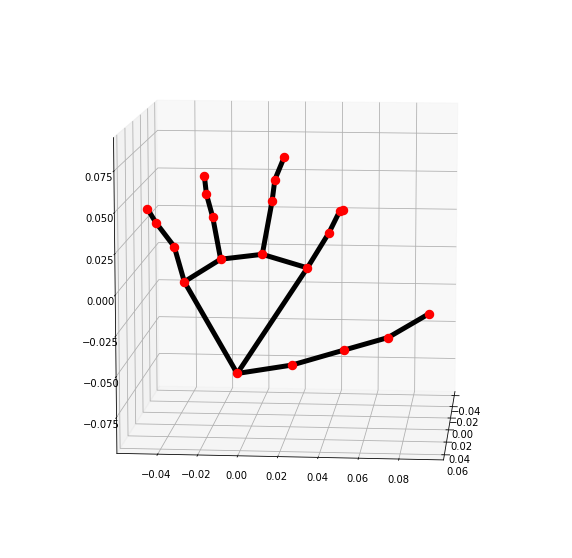

In [47]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

# For static images:
IMAGE_FILES = ['my_hand.jpg']
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:
  for idx, file in enumerate(IMAGE_FILES):
    # Read an image, flip it around y-axis for correct handedness output (see
    # above).
    image = cv2.flip(cv2.imread(file), 1)
    # Convert the BGR image to RGB before processing.
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print handedness and draw hand landmarks on the image.
    print('Handedness:', results.multi_handedness)
    if not results.multi_hand_landmarks:
      continue
    image_height, image_width, _ = image.shape
    annotated_image = image.copy()
    for hand_landmarks in results.multi_hand_landmarks:
      print('hand_landmarks:', hand_landmarks)
      print(
          f'Index finger tip coordinates: (',
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
      )
      mp_drawing.draw_landmarks(
          annotated_image,
          hand_landmarks,
          mp_hands.HAND_CONNECTIONS,
          mp_drawing_styles.get_default_hand_landmarks_style(),
          mp_drawing_styles.get_default_hand_connections_style())
    cv2.imwrite(
        'my_hand' + str(idx) + '.png', cv2.flip(annotated_image, 1))
    # Draw hand world landmarks.
    if not results.multi_hand_world_landmarks:
      continue
    for hand_world_landmarks in results.multi_hand_world_landmarks:
      mp_drawing.plot_landmarks(
        hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)

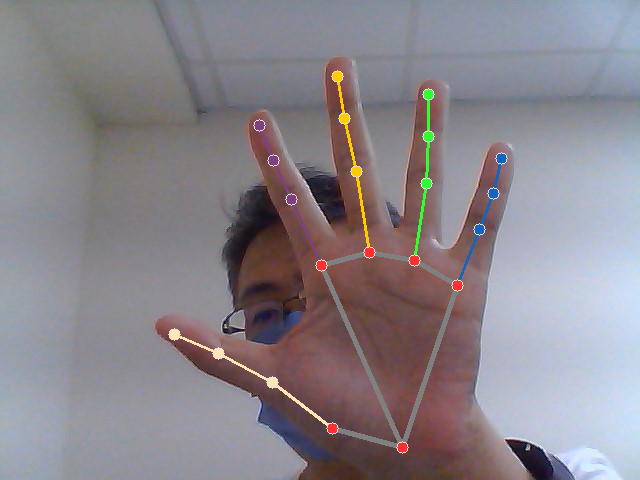

In [49]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

file = 'my_hand.jpg'
with mp_hands.Hands(static_image_mode=True,max_num_hands=2,min_detection_confidence=0.5) as hands:
  image = cv2.flip(cv2.imread(file), 1)
  # Convert the BGR image to RGB before processing.
  results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

  image_height, image_width, _ = image.shape
  annotated_image = image.copy()
  for hand_landmarks in results.multi_hand_landmarks:
    mp_drawing.draw_landmarks(
        annotated_image,
        hand_landmarks,
        mp_hands.HAND_CONNECTIONS,
        mp_drawing_styles.get_default_hand_landmarks_style(),
        mp_drawing_styles.get_default_hand_connections_style())
  cv2.imwrite('my_hand.png', cv2.flip(annotated_image, 1))

im = Image.open('my_hand.png')
im

# HOMEWORK

寫一個 gradio 的 APP，輸入手的圖形後，輸出畫上關節點的手的圖形。

In [ ]:
import matplotlib.pyplot as plt
def show(image):
  plt.imsave("test.jpg",image)
  return "Good"

gr.Interface(show, inputs="image", outputs="text").launch(share=True)

In [52]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

def draw_landmarks(image):
  with mp_hands.Hands(static_image_mode=True,max_num_hands=2,min_detection_confidence=0.5) as hands:
    image = cv2.flip(image, 1)
    results = hands.process(image)

    image_height, image_width, _ = image.shape
    annotated_image = image.copy()
    for hand_landmarks in results.multi_hand_landmarks:
      mp_drawing.draw_landmarks(
          annotated_image,
          hand_landmarks,
          mp_hands.HAND_CONNECTIONS,
          mp_drawing_styles.get_default_hand_landmarks_style(),
          mp_drawing_styles.get_default_hand_connections_style())
    image = cv2.flip(annotated_image, 1)
    return image

In [53]:
gr.Interface(draw_landmarks, inputs="image", outputs="image").launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://55027.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7eff0f24a590>,
 'http://127.0.0.1:7863/',
 'https://55027.gradio.app')